In [1]:
#----------------------------------SVM CODE USING PCA------------------------------------------------------
#----------------------------------------------------------------------------------------------------------

# Please download the dataset from Google drive and change the datafolder_name accordingly to run this file.

# bunch of libraries
import os # iterate through files
import pickle # storing the model
import random # shuffling files
from collections import defaultdict # Verification purpose
import cv2 # For processing image
import numpy as np # Storing X and Y values after processing
from sklearn import preprocessing # scalar and PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # SVM
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Storing all image pixel values in X and Labels associated with features in Y
X = []
y = []


# Verification purpose 
id_to_image = defaultdict(list)
image_name_list = []

# Define the folder path which consists of bunch of images
datafolder_name = 'TRAIN'

# Resize all the images in the folder ( Resizing is important otherwise the time processing will be more)
resize_width = 50
resize_height = 50

# How many images are there in the folder?
images_in_folder = 30000

# Get the subfolders present in train folder
y_label = os.listdir(datafolder_name)

# Store the values in numeric format i.e, 0 means it is organic and 1 means Recyclable
y_label_numeric = {y_value: i for i, y_value in enumerate(y_label)}

# Processing of all images in the folder
for label in y_label:
    y_folder = os.path.join(datafolder_name, label)
    image_files = [os.path.join( y_folder, filename) for filename in os.listdir( y_folder) if filename.endswith('.jpg')]
    
    # shuffle all the files
    random.shuffle(image_files)
    #print(image_files)
    
    # We are resizing, flattening and finally features are extracted into X and Store the labels in Y
    
    for image_file in image_files[:images_in_folder // len(y_label)]:
        image = cv2.imread(image_file) 
        image = cv2.resize(image, (resize_width, resize_height)) # resizing 50 * 50
        flattened_image = image.flatten() # image is flattened
        X.append(flattened_image) # storing all the pixel values in X_list
        y.append(y_label_numeric[label])  # 0 for Organic and 1 for Recyclable
        image_name_list.append(image_file)
        
print("--------------------STEP 1----PreProcessing of images is completed successfully---------------------------")


# Store the values of X and Y in numpy rather than list which would be easy for PCA
X = np.array(X)
#print(X)
y = np.array(y)
#print(y)


# Normalization of features using scaler
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler_norm = preprocessing.StandardScaler()
X = scaler_norm.fit_transform(X)

print("-------------------------STEP 2 -------------Normalization of feature vector is done successfully using scaler-----------------------------")


# Reducing the dimension of features using PCA which will help us to extract latent features and reduce dimensions

# Define variables required for PCA
total_samples, total_features = X.shape
number_of_components = min(total_samples, total_features) 

# Define PCA (Incremental PCA)
incremental_pca = IncrementalPCA(n_components=number_of_components)

# Process in batches otherwise the run time will be forever

# Reference - https://stackoverflow.com/questions/66716370/batch-size-and-training-time
batch_size = total_samples  
for i in range(0, X.shape[0], batch_size):
    X_batch_pca = X[i:i + batch_size]
    incremental_pca.partial_fit(X_batch_pca)

# Reference : https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html
X_pca = incremental_pca.transform(X)  

# Used for verification purpose
for index, element in enumerate(X_pca):
    key = sum(element)
    id_to_image[key].append(image_name_list[index])
    print("they key is %d and image is %s" %(key, image_name_list[index]))

print("--------------STEP 3 --------Dimensionality reduction using PCA completed successfully----------------------")



--------------------STEP 1----PreProcessing of images is completed successfully---------------------------
-------------------------STEP 2 -------------Normalization of feature vector is done successfully using scaler-----------------------------
they key is -18 and image is TRAIN\O\O_3870.jpg
they key is -117 and image is TRAIN\O\O_13359.jpg
they key is -20 and image is TRAIN\O\O_1780.jpg
they key is -153 and image is TRAIN\O\O_13492.jpg
they key is -6 and image is TRAIN\O\O_7485.jpg
they key is 15 and image is TRAIN\O\O_7468.jpg
they key is 1 and image is TRAIN\O\O_4302.jpg
they key is -90 and image is TRAIN\O\O_8005.jpg
they key is -37 and image is TRAIN\O\O_12738.jpg
they key is 18 and image is TRAIN\O\O_12172.jpg
they key is 73 and image is TRAIN\O\O_5924.jpg
they key is 70 and image is TRAIN\O\O_2004.jpg
they key is -53 and image is TRAIN\O\O_12973.jpg
they key is 68 and image is TRAIN\O\O_11117.jpg
they key is -146 and image is TRAIN\O\O_7952.jpg
they key is -45 and image is TRA

they key is 6 and image is TRAIN\O\O_10132.jpg
they key is 91 and image is TRAIN\O\O_4552.jpg
they key is 30 and image is TRAIN\O\O_2831.jpg
they key is 6 and image is TRAIN\O\O_10158.jpg
they key is 110 and image is TRAIN\O\O_441.jpg
they key is -86 and image is TRAIN\O\O_248.jpg
they key is -64 and image is TRAIN\O\O_8847.jpg
they key is 92 and image is TRAIN\O\O_1569.jpg
they key is 98 and image is TRAIN\O\O_8347.jpg
they key is -135 and image is TRAIN\O\O_2099.jpg
they key is -79 and image is TRAIN\O\O_5757.jpg
they key is -152 and image is TRAIN\O\O_5772.jpg
they key is -9 and image is TRAIN\O\O_12547.jpg
they key is 31 and image is TRAIN\O\O_11548.jpg
they key is 6 and image is TRAIN\O\O_9937.jpg
they key is -123 and image is TRAIN\O\O_5877.jpg
they key is 135 and image is TRAIN\O\O_4509.jpg
they key is -19 and image is TRAIN\O\O_2820.jpg
they key is -99 and image is TRAIN\O\O_11630.jpg
they key is -40 and image is TRAIN\O\O_4909.jpg
they key is -149 and image is TRAIN\O\O_2178.j

they key is -24 and image is TRAIN\O\O_12534.jpg
they key is 82 and image is TRAIN\O\O_2375.jpg
they key is -8 and image is TRAIN\O\O_11649.jpg
they key is -43 and image is TRAIN\O\O_3630.jpg
they key is 160 and image is TRAIN\O\O_11281.jpg
they key is -26 and image is TRAIN\O\O_8958.jpg
they key is 12 and image is TRAIN\O\O_4759.jpg
they key is 73 and image is TRAIN\O\O_1111.jpg
they key is -42 and image is TRAIN\O\O_7919.jpg
they key is 62 and image is TRAIN\O\O_5504.jpg
they key is -11 and image is TRAIN\O\O_9725.jpg
they key is -57 and image is TRAIN\O\O_8337.jpg
they key is -133 and image is TRAIN\O\O_3653.jpg
they key is 22 and image is TRAIN\O\O_5047.jpg
they key is -114 and image is TRAIN\O\O_1667.jpg
they key is -33 and image is TRAIN\O\O_13419.jpg
they key is 8 and image is TRAIN\O\O_4113.jpg
they key is -90 and image is TRAIN\O\O_9975.jpg
they key is 143 and image is TRAIN\O\O_6500.jpg
they key is -58 and image is TRAIN\O\O_11745.jpg
they key is -206 and image is TRAIN\O\O_1

they key is 82 and image is TRAIN\O\O_5497.jpg
they key is -66 and image is TRAIN\O\O_5103.jpg
they key is -3 and image is TRAIN\O\O_8413.jpg
they key is -2 and image is TRAIN\O\O_483.jpg
they key is -60 and image is TRAIN\O\O_5551.jpg
they key is -53 and image is TRAIN\O\O_13651.jpg
they key is -48 and image is TRAIN\O\O_2829.jpg
they key is 134 and image is TRAIN\O\O_9611.jpg
they key is 58 and image is TRAIN\O\O_12222.jpg
they key is -74 and image is TRAIN\O\O_5997.jpg
they key is 74 and image is TRAIN\O\O_6190.jpg
they key is -105 and image is TRAIN\O\O_7261.jpg
they key is 90 and image is TRAIN\O\O_261.jpg
they key is 70 and image is TRAIN\O\O_2852.jpg
they key is -46 and image is TRAIN\O\O_12949.jpg
they key is -28 and image is TRAIN\O\O_704.jpg
they key is 17 and image is TRAIN\O\O_2020.jpg
they key is -72 and image is TRAIN\O\O_5728.jpg
they key is -36 and image is TRAIN\O\O_10302.jpg
they key is -50 and image is TRAIN\O\O_7473.jpg
they key is -76 and image is TRAIN\O\O_13817.j

they key is 19 and image is TRAIN\O\O_1762.jpg
they key is -33 and image is TRAIN\O\O_13892.jpg
they key is -143 and image is TRAIN\O\O_7927.jpg
they key is 76 and image is TRAIN\O\O_12054.jpg
they key is -48 and image is TRAIN\O\O_8452.jpg
they key is 11 and image is TRAIN\O\O_5122.jpg
they key is -22 and image is TRAIN\O\O_5462.jpg
they key is 88 and image is TRAIN\O\O_5713.jpg
they key is 55 and image is TRAIN\O\O_6730.jpg
they key is -108 and image is TRAIN\O\O_13836.jpg
they key is 75 and image is TRAIN\O\O_11492.jpg
they key is 33 and image is TRAIN\O\O_4017.jpg
they key is -49 and image is TRAIN\O\O_8852.jpg
they key is 122 and image is TRAIN\O\O_9204.jpg
they key is -117 and image is TRAIN\O\O_4432.jpg
they key is 7 and image is TRAIN\O\O_11647.jpg
they key is -79 and image is TRAIN\O\O_404.jpg
they key is -74 and image is TRAIN\O\O_2647.jpg
they key is 98 and image is TRAIN\O\O_6373.jpg
they key is 0 and image is TRAIN\O\O_1057.jpg
they key is 34 and image is TRAIN\O\O_7604.jp

they key is -43 and image is TRAIN\O\O_9243.jpg
they key is -141 and image is TRAIN\O\O_9996.jpg
they key is -114 and image is TRAIN\O\O_2639.jpg
they key is 31 and image is TRAIN\O\O_5699.jpg
they key is 89 and image is TRAIN\O\O_9677.jpg
they key is -121 and image is TRAIN\O\O_915.jpg
they key is 118 and image is TRAIN\O\O_1768.jpg
they key is 5 and image is TRAIN\O\O_11810.jpg
they key is 109 and image is TRAIN\O\O_9053.jpg
they key is -197 and image is TRAIN\O\O_637.jpg
they key is -43 and image is TRAIN\O\O_10056.jpg
they key is 86 and image is TRAIN\O\O_6371.jpg
they key is -127 and image is TRAIN\O\O_5828.jpg
they key is 76 and image is TRAIN\O\O_2201.jpg
they key is 43 and image is TRAIN\O\O_11037.jpg
they key is -98 and image is TRAIN\O\O_10854.jpg
they key is 43 and image is TRAIN\O\O_8184.jpg
they key is 0 and image is TRAIN\O\O_12866.jpg
they key is -28 and image is TRAIN\O\O_13351.jpg
they key is -68 and image is TRAIN\O\O_2392.jpg
they key is -29 and image is TRAIN\O\O_12

they key is -91 and image is TRAIN\O\O_1382.jpg
they key is -44 and image is TRAIN\O\O_8266.jpg
they key is -59 and image is TRAIN\O\O_2857.jpg
they key is 78 and image is TRAIN\O\O_8656.jpg
they key is -139 and image is TRAIN\O\O_4514.jpg
they key is -70 and image is TRAIN\O\O_1537.jpg
they key is -140 and image is TRAIN\O\O_3293.jpg
they key is 53 and image is TRAIN\O\O_11899.jpg
they key is 19 and image is TRAIN\O\O_1657.jpg
they key is -53 and image is TRAIN\O\O_2866.jpg
they key is 48 and image is TRAIN\O\O_11268.jpg
they key is -139 and image is TRAIN\O\O_1176.jpg
they key is -173 and image is TRAIN\O\O_10148.jpg
they key is -23 and image is TRAIN\O\O_9978.jpg
they key is 35 and image is TRAIN\O\O_13048.jpg
they key is -136 and image is TRAIN\O\O_13424.jpg
they key is 25 and image is TRAIN\O\O_6068.jpg
they key is 53 and image is TRAIN\O\O_5647.jpg
they key is -76 and image is TRAIN\O\O_8401.jpg
they key is 28 and image is TRAIN\O\O_4266.jpg
they key is 150 and image is TRAIN\O\O

they key is 4 and image is TRAIN\O\O_9307.jpg
they key is -166 and image is TRAIN\O\O_9954.jpg
they key is 23 and image is TRAIN\O\O_2068.jpg
they key is 13 and image is TRAIN\O\O_3204.jpg
they key is -24 and image is TRAIN\O\O_10327.jpg
they key is 77 and image is TRAIN\O\O_1882.jpg
they key is 0 and image is TRAIN\O\O_254.jpg
they key is -115 and image is TRAIN\O\O_7786.jpg
they key is -18 and image is TRAIN\O\O_1553.jpg
they key is 29 and image is TRAIN\O\O_1453.jpg
they key is -38 and image is TRAIN\O\O_878.jpg
they key is -16 and image is TRAIN\O\O_5571.jpg
they key is -83 and image is TRAIN\O\O_7020.jpg
they key is 11 and image is TRAIN\O\O_7371.jpg
they key is 24 and image is TRAIN\O\O_5951.jpg
they key is 19 and image is TRAIN\O\O_10926.jpg
they key is 4 and image is TRAIN\O\O_7657.jpg
they key is -116 and image is TRAIN\O\O_12964.jpg
they key is -9 and image is TRAIN\O\O_4706.jpg
they key is -15 and image is TRAIN\O\O_4744.jpg
they key is 107 and image is TRAIN\O\O_5183.jpg
th

they key is -51 and image is TRAIN\O\O_8483.jpg
they key is 40 and image is TRAIN\O\O_13381.jpg
they key is -46 and image is TRAIN\O\O_988.jpg
they key is -115 and image is TRAIN\O\O_5990.jpg
they key is 41 and image is TRAIN\O\O_632.jpg
they key is 40 and image is TRAIN\O\O_2578.jpg
they key is -96 and image is TRAIN\O\O_12889.jpg
they key is -106 and image is TRAIN\O\O_1243.jpg
they key is 92 and image is TRAIN\O\O_13571.jpg
they key is -46 and image is TRAIN\O\O_1177.jpg
they key is -66 and image is TRAIN\O\O_898.jpg
they key is 25 and image is TRAIN\O\O_8685.jpg
they key is -19 and image is TRAIN\O\O_5901.jpg
they key is -96 and image is TRAIN\O\O_7048.jpg
they key is -80 and image is TRAIN\O\O_6961.jpg
they key is -16 and image is TRAIN\O\O_11400.jpg
they key is 94 and image is TRAIN\O\O_9772.jpg
they key is 26 and image is TRAIN\O\O_864.jpg
they key is -103 and image is TRAIN\O\O_3469.jpg
they key is 69 and image is TRAIN\O\O_5680.jpg
they key is -56 and image is TRAIN\O\O_4385.j

they key is -55 and image is TRAIN\O\O_4285.jpg
they key is -18 and image is TRAIN\O\O_13377.jpg
they key is -166 and image is TRAIN\O\O_6178.jpg
they key is -48 and image is TRAIN\O\O_8551.jpg
they key is -107 and image is TRAIN\O\O_12676.jpg
they key is -75 and image is TRAIN\O\O_5727.jpg
they key is 1 and image is TRAIN\O\O_4596.jpg
they key is -150 and image is TRAIN\O\O_8027.jpg
they key is 81 and image is TRAIN\O\O_12251.jpg
they key is -25 and image is TRAIN\O\O_11422.jpg
they key is -87 and image is TRAIN\O\O_8284.jpg
they key is -125 and image is TRAIN\O\O_5697.jpg
they key is -99 and image is TRAIN\O\O_10000.jpg
they key is -28 and image is TRAIN\O\O_6312.jpg
they key is 4 and image is TRAIN\O\O_7256.jpg
they key is -57 and image is TRAIN\O\O_13214.jpg
they key is -72 and image is TRAIN\O\O_2488.jpg
they key is 136 and image is TRAIN\O\O_11735.jpg
they key is 33 and image is TRAIN\O\O_1905.jpg
they key is -10 and image is TRAIN\O\O_11231.jpg
they key is 27 and image is TRAIN\

they key is 29 and image is TRAIN\O\O_2612.jpg
they key is -117 and image is TRAIN\O\O_9824.jpg
they key is -143 and image is TRAIN\O\O_5474.jpg
they key is 39 and image is TRAIN\O\O_9571.jpg
they key is -36 and image is TRAIN\O\O_13346.jpg
they key is -98 and image is TRAIN\O\O_8829.jpg
they key is -87 and image is TRAIN\O\O_8434.jpg
they key is 131 and image is TRAIN\O\O_9878.jpg
they key is -179 and image is TRAIN\O\O_6657.jpg
they key is 160 and image is TRAIN\O\O_10235.jpg
they key is 24 and image is TRAIN\O\O_12430.jpg
they key is 53 and image is TRAIN\O\O_73.jpg
they key is 11 and image is TRAIN\O\O_7357.jpg
they key is 101 and image is TRAIN\O\O_4215.jpg
they key is -95 and image is TRAIN\O\O_8223.jpg
they key is 34 and image is TRAIN\O\O_1515.jpg
they key is 96 and image is TRAIN\O\O_33.jpg
they key is -152 and image is TRAIN\O\O_13538.jpg
they key is -1 and image is TRAIN\O\O_13568.jpg
they key is -50 and image is TRAIN\O\O_6953.jpg
they key is 13 and image is TRAIN\O\O_13269

they key is -1 and image is TRAIN\O\O_10213.jpg
they key is 101 and image is TRAIN\O\O_1504.jpg
they key is -15 and image is TRAIN\O\O_10057.jpg
they key is -57 and image is TRAIN\O\O_7783.jpg
they key is -86 and image is TRAIN\O\O_12460.jpg
they key is -52 and image is TRAIN\O\O_10123.jpg
they key is -156 and image is TRAIN\O\O_3137.jpg
they key is 54 and image is TRAIN\O\O_11059.jpg
they key is -107 and image is TRAIN\O\O_5527.jpg
they key is -45 and image is TRAIN\O\O_4484.jpg
they key is -10 and image is TRAIN\O\O_8026.jpg
they key is -111 and image is TRAIN\O\O_681.jpg
they key is 42 and image is TRAIN\O\O_3310.jpg
they key is 57 and image is TRAIN\O\O_7349.jpg
they key is -9 and image is TRAIN\O\O_12905.jpg
they key is -12 and image is TRAIN\O\O_11327.jpg
they key is -4 and image is TRAIN\O\O_12093.jpg
they key is -134 and image is TRAIN\O\O_3414.jpg
they key is -49 and image is TRAIN\O\O_5060.jpg
they key is -40 and image is TRAIN\O\O_11098.jpg
they key is -72 and image is TRAIN

they key is 93 and image is TRAIN\O\O_792.jpg
they key is 29 and image is TRAIN\O\O_10927.jpg
they key is -141 and image is TRAIN\O\O_7806.jpg
they key is -35 and image is TRAIN\O\O_8368.jpg
they key is -31 and image is TRAIN\O\O_10087.jpg
they key is 7 and image is TRAIN\O\O_10233.jpg
they key is -13 and image is TRAIN\O\O_1835.jpg
they key is 16 and image is TRAIN\O\O_9605.jpg
they key is -22 and image is TRAIN\O\O_8499.jpg
they key is -98 and image is TRAIN\O\O_8198.jpg
they key is -23 and image is TRAIN\O\O_8123.jpg
they key is -107 and image is TRAIN\O\O_12644.jpg
they key is -11 and image is TRAIN\O\O_4046.jpg
they key is 29 and image is TRAIN\O\O_6723.jpg
they key is 71 and image is TRAIN\O\O_520.jpg
they key is -131 and image is TRAIN\O\O_12341.jpg
they key is -142 and image is TRAIN\O\O_1977.jpg
they key is -81 and image is TRAIN\O\O_3223.jpg
they key is 47 and image is TRAIN\O\O_1858.jpg
they key is -22 and image is TRAIN\O\O_273.jpg
they key is -59 and image is TRAIN\O\O_357

they key is -30 and image is TRAIN\O\O_2366.jpg
they key is 12 and image is TRAIN\O\O_4274.jpg
they key is 27 and image is TRAIN\O\O_5337.jpg
they key is -53 and image is TRAIN\O\O_345.jpg
they key is -57 and image is TRAIN\O\O_791.jpg
they key is -9 and image is TRAIN\O\O_8383.jpg
they key is 15 and image is TRAIN\O\O_12683.jpg
they key is 18 and image is TRAIN\O\O_5414.jpg
they key is -58 and image is TRAIN\O\O_13146.jpg
they key is 13 and image is TRAIN\O\O_6585.jpg
they key is 97 and image is TRAIN\O\O_3020.jpg
they key is -43 and image is TRAIN\O\O_13869.jpg
they key is 87 and image is TRAIN\O\O_6532.jpg
they key is -77 and image is TRAIN\O\O_9628.jpg
they key is 42 and image is TRAIN\O\O_5451.jpg
they key is 0 and image is TRAIN\O\O_7671.jpg
they key is 7 and image is TRAIN\O\O_12510.jpg
they key is -48 and image is TRAIN\O\O_414.jpg
they key is -140 and image is TRAIN\O\O_3131.jpg
they key is 74 and image is TRAIN\O\O_48.jpg
they key is 22 and image is TRAIN\O\O_7539.jpg
they ke

they key is -105 and image is TRAIN\O\O_3767.jpg
they key is 96 and image is TRAIN\O\O_5273.jpg
they key is 24 and image is TRAIN\O\O_42.jpg
they key is -131 and image is TRAIN\O\O_13663.jpg
they key is -70 and image is TRAIN\O\O_12795.jpg
they key is 159 and image is TRAIN\O\O_513.jpg
they key is 95 and image is TRAIN\O\O_3994.jpg
they key is -13 and image is TRAIN\O\O_7997.jpg
they key is 63 and image is TRAIN\O\O_5127.jpg
they key is -73 and image is TRAIN\O\O_2877.jpg
they key is -44 and image is TRAIN\O\O_7233.jpg
they key is -76 and image is TRAIN\O\O_2784.jpg
they key is 74 and image is TRAIN\O\O_1480.jpg
they key is -57 and image is TRAIN\O\O_624.jpg
they key is -146 and image is TRAIN\O\O_10030.jpg
they key is -56 and image is TRAIN\O\O_2335.jpg
they key is -180 and image is TRAIN\O\O_1676.jpg
they key is -11 and image is TRAIN\O\O_12232.jpg
they key is 285 and image is TRAIN\O\O_1122.jpg
they key is 140 and image is TRAIN\O\O_11622.jpg
they key is -85 and image is TRAIN\O\O_7

they key is 64 and image is TRAIN\O\O_13283.jpg
they key is -30 and image is TRAIN\O\O_1008.jpg
they key is -39 and image is TRAIN\O\O_5348.jpg
they key is -36 and image is TRAIN\O\O_11329.jpg
they key is -154 and image is TRAIN\O\O_10434.jpg
they key is 87 and image is TRAIN\O\O_12169.jpg
they key is 53 and image is TRAIN\O\O_12613.jpg
they key is -74 and image is TRAIN\O\O_10112.jpg
they key is 94 and image is TRAIN\O\O_12561.jpg
they key is -139 and image is TRAIN\O\O_7639.jpg
they key is 99 and image is TRAIN\O\O_5342.jpg
they key is -9 and image is TRAIN\O\O_3247.jpg
they key is -90 and image is TRAIN\O\O_11679.jpg
they key is 116 and image is TRAIN\O\O_10757.jpg
they key is 14 and image is TRAIN\O\O_6011.jpg
they key is -113 and image is TRAIN\O\O_9780.jpg
they key is -119 and image is TRAIN\O\O_10108.jpg
they key is -41 and image is TRAIN\O\O_5614.jpg
they key is -20 and image is TRAIN\O\O_3930.jpg
they key is -14 and image is TRAIN\O\O_5939.jpg
they key is -88 and image is TRAI

they key is 47 and image is TRAIN\O\O_13871.jpg
they key is -20 and image is TRAIN\O\O_1542.jpg
they key is -6 and image is TRAIN\O\O_2082.jpg
they key is -98 and image is TRAIN\O\O_10396.jpg
they key is 25 and image is TRAIN\O\O_9195.jpg
they key is 94 and image is TRAIN\O\O_9223.jpg
they key is -79 and image is TRAIN\O\O_4863.jpg
they key is -59 and image is TRAIN\O\O_12478.jpg
they key is 41 and image is TRAIN\O\O_7405.jpg
they key is 44 and image is TRAIN\O\O_2137.jpg
they key is -18 and image is TRAIN\O\O_8493.jpg
they key is -5 and image is TRAIN\O\O_6818.jpg
they key is -84 and image is TRAIN\O\O_6540.jpg
they key is -64 and image is TRAIN\O\O_2079.jpg
they key is 81 and image is TRAIN\O\O_5496.jpg
they key is -155 and image is TRAIN\O\O_12864.jpg
they key is 4 and image is TRAIN\O\O_1194.jpg
they key is -70 and image is TRAIN\O\O_7077.jpg
they key is -76 and image is TRAIN\O\O_3108.jpg
they key is -98 and image is TRAIN\O\O_1332.jpg
they key is 15 and image is TRAIN\O\O_12307.j

they key is -128 and image is TRAIN\O\O_3006.jpg
they key is 217 and image is TRAIN\O\O_4879.jpg
they key is 25 and image is TRAIN\O\O_5791.jpg
they key is 12 and image is TRAIN\O\O_8635.jpg
they key is -79 and image is TRAIN\O\O_10077.jpg
they key is -253 and image is TRAIN\O\O_1299.jpg
they key is -45 and image is TRAIN\O\O_3127.jpg
they key is -33 and image is TRAIN\O\O_10725.jpg
they key is 58 and image is TRAIN\O\O_5483.jpg
they key is -144 and image is TRAIN\O\O_317.jpg
they key is -233 and image is TRAIN\O\O_5921.jpg
they key is 78 and image is TRAIN\O\O_1494.jpg
they key is 12 and image is TRAIN\O\O_13233.jpg
they key is 29 and image is TRAIN\O\O_870.jpg
they key is -5 and image is TRAIN\O\O_11159.jpg
they key is -59 and image is TRAIN\O\O_3183.jpg
they key is 166 and image is TRAIN\O\O_8955.jpg
they key is -138 and image is TRAIN\O\O_9936.jpg
they key is 78 and image is TRAIN\O\O_9851.jpg
they key is -84 and image is TRAIN\O\O_3287.jpg
they key is -79 and image is TRAIN\O\O_97

they key is -155 and image is TRAIN\O\O_6570.jpg
they key is 110 and image is TRAIN\O\O_8961.jpg
they key is -238 and image is TRAIN\O\O_1278.jpg
they key is 58 and image is TRAIN\O\O_1379.jpg
they key is 43 and image is TRAIN\O\O_11034.jpg
they key is 32 and image is TRAIN\O\O_3510.jpg
they key is -65 and image is TRAIN\O\O_2737.jpg
they key is -14 and image is TRAIN\O\O_5780.jpg
they key is 197 and image is TRAIN\O\O_340.jpg
they key is -199 and image is TRAIN\O\O_8015.jpg
they key is 114 and image is TRAIN\O\O_8984.jpg
they key is -154 and image is TRAIN\O\O_6719.jpg
they key is 76 and image is TRAIN\O\O_4068.jpg
they key is 48 and image is TRAIN\O\O_12507.jpg
they key is -61 and image is TRAIN\O\O_795.jpg
they key is 15 and image is TRAIN\O\O_2152.jpg
they key is -80 and image is TRAIN\O\O_5407.jpg
they key is -9 and image is TRAIN\O\O_13442.jpg
they key is -103 and image is TRAIN\O\O_9967.jpg
they key is -120 and image is TRAIN\O\O_121.jpg
they key is -95 and image is TRAIN\O\O_76

they key is -112 and image is TRAIN\O\O_8018.jpg
they key is -6 and image is TRAIN\O\O_3875.jpg
they key is 18 and image is TRAIN\O\O_13603.jpg
they key is -58 and image is TRAIN\O\O_13691.jpg
they key is 39 and image is TRAIN\O\O_9377.jpg
they key is -43 and image is TRAIN\O\O_3385.jpg
they key is 24 and image is TRAIN\O\O_11619.jpg
they key is -105 and image is TRAIN\O\O_10362.jpg
they key is 86 and image is TRAIN\O\O_12010.jpg
they key is 78 and image is TRAIN\O\O_11359.jpg
they key is -145 and image is TRAIN\O\O_5826.jpg
they key is -55 and image is TRAIN\O\O_5281.jpg
they key is 93 and image is TRAIN\O\O_12095.jpg
they key is 226 and image is TRAIN\O\O_7175.jpg
they key is -47 and image is TRAIN\O\O_13894.jpg
they key is -7 and image is TRAIN\O\O_3952.jpg
they key is -14 and image is TRAIN\O\O_2211.jpg
they key is -57 and image is TRAIN\O\O_3512.jpg
they key is -96 and image is TRAIN\O\O_975.jpg
they key is -24 and image is TRAIN\O\O_6440.jpg
they key is 18 and image is TRAIN\O\O_

they key is 31 and image is TRAIN\O\O_630.jpg
they key is 114 and image is TRAIN\O\O_10864.jpg
they key is 59 and image is TRAIN\O\O_484.jpg
they key is 98 and image is TRAIN\O\O_5380.jpg
they key is -96 and image is TRAIN\O\O_2409.jpg
they key is 45 and image is TRAIN\O\O_12627.jpg
they key is -25 and image is TRAIN\O\O_13686.jpg
they key is -50 and image is TRAIN\O\O_4737.jpg
they key is 79 and image is TRAIN\O\O_10793.jpg
they key is 37 and image is TRAIN\O\O_3592.jpg
they key is 86 and image is TRAIN\O\O_5432.jpg
they key is -59 and image is TRAIN\O\O_10258.jpg
they key is 56 and image is TRAIN\O\O_9635.jpg
they key is -118 and image is TRAIN\O\O_9811.jpg
they key is 49 and image is TRAIN\O\O_6262.jpg
they key is 72 and image is TRAIN\O\O_7301.jpg
they key is 186 and image is TRAIN\O\O_11252.jpg
they key is -58 and image is TRAIN\O\O_4558.jpg
they key is 1 and image is TRAIN\O\O_1162.jpg
they key is 120 and image is TRAIN\O\O_2151.jpg
they key is -31 and image is TRAIN\O\O_4084.jpg

they key is -196 and image is TRAIN\O\O_117.jpg
they key is -53 and image is TRAIN\O\O_6892.jpg
they key is 11 and image is TRAIN\O\O_13909.jpg
they key is -64 and image is TRAIN\O\O_1341.jpg
they key is -55 and image is TRAIN\O\O_13853.jpg
they key is -3 and image is TRAIN\O\O_11366.jpg
they key is -111 and image is TRAIN\O\O_3745.jpg
they key is -44 and image is TRAIN\O\O_10504.jpg
they key is -129 and image is TRAIN\O\O_3402.jpg
they key is -36 and image is TRAIN\O\O_7337.jpg
they key is 156 and image is TRAIN\O\O_10986.jpg
they key is 14 and image is TRAIN\O\O_6208.jpg
they key is 52 and image is TRAIN\O\O_3632.jpg
they key is 18 and image is TRAIN\O\O_12593.jpg
they key is 61 and image is TRAIN\O\O_10921.jpg
they key is -6 and image is TRAIN\O\O_8478.jpg
they key is -122 and image is TRAIN\O\O_11971.jpg
they key is -41 and image is TRAIN\O\O_5820.jpg
they key is -45 and image is TRAIN\O\O_9163.jpg
they key is -44 and image is TRAIN\O\O_12665.jpg
they key is -42 and image is TRAIN\

they key is -88 and image is TRAIN\O\O_8535.jpg
they key is -193 and image is TRAIN\O\O_10426.jpg
they key is -62 and image is TRAIN\O\O_2637.jpg
they key is -123 and image is TRAIN\O\O_785.jpg
they key is -81 and image is TRAIN\O\O_5398.jpg
they key is 172 and image is TRAIN\O\O_10613.jpg
they key is 61 and image is TRAIN\O\O_7920.jpg
they key is -46 and image is TRAIN\O\O_2325.jpg
they key is 31 and image is TRAIN\O\O_2533.jpg
they key is 105 and image is TRAIN\O\O_9066.jpg
they key is -119 and image is TRAIN\O\O_848.jpg
they key is -136 and image is TRAIN\O\O_11304.jpg
they key is -89 and image is TRAIN\O\O_6467.jpg
they key is 74 and image is TRAIN\O\O_12145.jpg
they key is 168 and image is TRAIN\O\O_10901.jpg
they key is -6 and image is TRAIN\O\O_12965.jpg
they key is -11 and image is TRAIN\O\O_13885.jpg
they key is -127 and image is TRAIN\O\O_7136.jpg
they key is -104 and image is TRAIN\O\O_13390.jpg
they key is -38 and image is TRAIN\O\O_9380.jpg
they key is 3 and image is TRAIN

they key is -102 and image is TRAIN\O\O_3314.jpg
they key is 31 and image is TRAIN\O\O_9588.jpg
they key is 192 and image is TRAIN\O\O_5290.jpg
they key is -57 and image is TRAIN\O\O_6954.jpg
they key is 7 and image is TRAIN\O\O_4255.jpg
they key is 188 and image is TRAIN\O\O_11545.jpg
they key is 94 and image is TRAIN\O\O_10083.jpg
they key is 38 and image is TRAIN\O\O_291.jpg
they key is -7 and image is TRAIN\O\O_3696.jpg
they key is 72 and image is TRAIN\O\O_7259.jpg
they key is -109 and image is TRAIN\O\O_9995.jpg
they key is -132 and image is TRAIN\O\O_2307.jpg
they key is 56 and image is TRAIN\O\O_5001.jpg
they key is -4 and image is TRAIN\O\O_5573.jpg
they key is 11 and image is TRAIN\O\O_10537.jpg
they key is 30 and image is TRAIN\O\O_9505.jpg
they key is -41 and image is TRAIN\O\O_4325.jpg
they key is 95 and image is TRAIN\O\O_6308.jpg
they key is -36 and image is TRAIN\O\O_411.jpg
they key is 46 and image is TRAIN\O\O_13681.jpg
they key is -57 and image is TRAIN\O\O_5137.jpg


they key is 4 and image is TRAIN\O\O_9427.jpg
they key is -118 and image is TRAIN\O\O_1479.jpg
they key is -135 and image is TRAIN\O\O_174.jpg
they key is -84 and image is TRAIN\O\O_2379.jpg
they key is 65 and image is TRAIN\O\O_9138.jpg
they key is -164 and image is TRAIN\O\O_10082.jpg
they key is -36 and image is TRAIN\O\O_4858.jpg
they key is 0 and image is TRAIN\O\O_2676.jpg
they key is -96 and image is TRAIN\O\O_12356.jpg
they key is 162 and image is TRAIN\O\O_6921.jpg
they key is -144 and image is TRAIN\O\O_269.jpg
they key is -107 and image is TRAIN\O\O_4206.jpg
they key is 3 and image is TRAIN\O\O_5388.jpg
they key is -131 and image is TRAIN\O\O_7924.jpg
they key is -68 and image is TRAIN\O\O_4151.jpg
they key is -89 and image is TRAIN\O\O_7276.jpg
they key is -135 and image is TRAIN\O\O_9617.jpg
they key is 47 and image is TRAIN\O\O_11298.jpg
they key is -68 and image is TRAIN\O\O_3636.jpg
they key is 11 and image is TRAIN\O\O_1075.jpg
they key is 21 and image is TRAIN\O\O_121

they key is 2 and image is TRAIN\O\O_5160.jpg
they key is 4 and image is TRAIN\O\O_1443.jpg
they key is -5 and image is TRAIN\O\O_3468.jpg
they key is -84 and image is TRAIN\O\O_7960.jpg
they key is -74 and image is TRAIN\O\O_13039.jpg
they key is -10 and image is TRAIN\O\O_7738.jpg
they key is 12 and image is TRAIN\O\O_4227.jpg
they key is -73 and image is TRAIN\O\O_3583.jpg
they key is -36 and image is TRAIN\O\O_1622.jpg
they key is -3 and image is TRAIN\O\O_13672.jpg
they key is 13 and image is TRAIN\O\O_1859.jpg
they key is -54 and image is TRAIN\O\O_2870.jpg
they key is -80 and image is TRAIN\O\O_8492.jpg
they key is 22 and image is TRAIN\O\O_1477.jpg
they key is 0 and image is TRAIN\O\O_7544.jpg
they key is 133 and image is TRAIN\O\O_10838.jpg
they key is 37 and image is TRAIN\O\O_6641.jpg
they key is 45 and image is TRAIN\O\O_12256.jpg
they key is -48 and image is TRAIN\O\O_10807.jpg
they key is 5 and image is TRAIN\O\O_7638.jpg
they key is 170 and image is TRAIN\O\O_7728.jpg
th

they key is -48 and image is TRAIN\O\O_7066.jpg
they key is -69 and image is TRAIN\O\O_10292.jpg
they key is 50 and image is TRAIN\O\O_7041.jpg
they key is 141 and image is TRAIN\O\O_9976.jpg
they key is -232 and image is TRAIN\O\O_7961.jpg
they key is 119 and image is TRAIN\O\O_11220.jpg
they key is 25 and image is TRAIN\O\O_11328.jpg
they key is 99 and image is TRAIN\O\O_10365.jpg
they key is 56 and image is TRAIN\O\O_13833.jpg
they key is -46 and image is TRAIN\O\O_11003.jpg
they key is 104 and image is TRAIN\O\O_293.jpg
they key is -154 and image is TRAIN\O\O_9880.jpg
they key is 15 and image is TRAIN\O\O_13408.jpg
they key is 32 and image is TRAIN\O\O_12212.jpg
they key is 132 and image is TRAIN\O\O_4814.jpg
they key is 136 and image is TRAIN\O\O_5374.jpg
they key is 44 and image is TRAIN\O\O_12878.jpg
they key is -252 and image is TRAIN\O\O_8065.jpg
they key is 52 and image is TRAIN\O\O_12134.jpg
they key is -145 and image is TRAIN\O\O_1533.jpg
they key is -57 and image is TRAIN\

they key is -98 and image is TRAIN\O\O_8221.jpg
they key is 0 and image is TRAIN\O\O_5009.jpg
they key is -93 and image is TRAIN\O\O_1958.jpg
they key is 105 and image is TRAIN\O\O_11911.jpg
they key is 55 and image is TRAIN\O\O_9032.jpg
they key is 165 and image is TRAIN\O\O_2403.jpg
they key is 59 and image is TRAIN\O\O_11221.jpg
they key is 51 and image is TRAIN\O\O_5580.jpg
they key is 18 and image is TRAIN\O\O_13147.jpg
they key is 47 and image is TRAIN\O\O_11214.jpg
they key is 80 and image is TRAIN\O\O_1617.jpg
they key is 57 and image is TRAIN\O\O_9806.jpg
they key is -117 and image is TRAIN\O\O_4405.jpg
they key is 17 and image is TRAIN\O\O_11075.jpg
they key is 61 and image is TRAIN\O\O_11180.jpg
they key is -96 and image is TRAIN\O\O_4655.jpg
they key is -9 and image is TRAIN\O\O_4694.jpg
they key is 14 and image is TRAIN\O\O_13382.jpg
they key is -115 and image is TRAIN\O\O_10281.jpg
they key is 34 and image is TRAIN\O\O_6611.jpg
they key is 82 and image is TRAIN\O\O_25.jpg

they key is -91 and image is TRAIN\O\O_3580.jpg
they key is 5 and image is TRAIN\O\O_5044.jpg
they key is 32 and image is TRAIN\O\O_7390.jpg
they key is -87 and image is TRAIN\O\O_11628.jpg
they key is -71 and image is TRAIN\O\O_7170.jpg
they key is 72 and image is TRAIN\O\O_13415.jpg
they key is 51 and image is TRAIN\O\O_12156.jpg
they key is -93 and image is TRAIN\O\O_717.jpg
they key is 26 and image is TRAIN\O\O_9711.jpg
they key is -128 and image is TRAIN\O\O_6772.jpg
they key is 116 and image is TRAIN\O\O_1540.jpg
they key is 27 and image is TRAIN\O\O_8446.jpg
they key is -8 and image is TRAIN\O\O_10406.jpg
they key is -119 and image is TRAIN\O\O_76.jpg
they key is -58 and image is TRAIN\O\O_10338.jpg
they key is -68 and image is TRAIN\O\O_4365.jpg
they key is -19 and image is TRAIN\O\O_2920.jpg
they key is 22 and image is TRAIN\O\O_13284.jpg
they key is -47 and image is TRAIN\O\O_6426.jpg
they key is -14 and image is TRAIN\O\O_8843.jpg
they key is -8 and image is TRAIN\O\O_2519.j

they key is -119 and image is TRAIN\O\O_13291.jpg
they key is 92 and image is TRAIN\O\O_6573.jpg
they key is 193 and image is TRAIN\O\O_5918.jpg
they key is -103 and image is TRAIN\O\O_1367.jpg
they key is 186 and image is TRAIN\O\O_11125.jpg
they key is 19 and image is TRAIN\O\O_8556.jpg
they key is -215 and image is TRAIN\O\O_4019.jpg
they key is -77 and image is TRAIN\O\O_5794.jpg
they key is 34 and image is TRAIN\O\O_12420.jpg
they key is -121 and image is TRAIN\O\O_9592.jpg
they key is 32 and image is TRAIN\O\O_13400.jpg
they key is 25 and image is TRAIN\O\O_6147.jpg
they key is -22 and image is TRAIN\O\O_8388.jpg
they key is -124 and image is TRAIN\O\O_1313.jpg
they key is -70 and image is TRAIN\O\O_4673.jpg
they key is 16 and image is TRAIN\O\O_5952.jpg
they key is -134 and image is TRAIN\O\O_2986.jpg
they key is -50 and image is TRAIN\O\O_2897.jpg
they key is 17 and image is TRAIN\O\O_11817.jpg
they key is -17 and image is TRAIN\O\O_4015.jpg
they key is -79 and image is TRAIN\O

they key is -42 and image is TRAIN\O\O_10945.jpg
they key is -30 and image is TRAIN\O\O_3712.jpg
they key is -97 and image is TRAIN\O\O_4191.jpg
they key is -13 and image is TRAIN\O\O_2302.jpg
they key is -53 and image is TRAIN\O\O_12424.jpg
they key is -47 and image is TRAIN\O\O_5848.jpg
they key is 85 and image is TRAIN\O\O_4738.jpg
they key is 4 and image is TRAIN\O\O_4265.jpg
they key is 146 and image is TRAIN\O\O_12858.jpg
they key is 61 and image is TRAIN\O\O_7464.jpg
they key is 136 and image is TRAIN\O\O_9748.jpg
they key is -183 and image is TRAIN\O\O_10059.jpg
they key is 191 and image is TRAIN\O\O_10819.jpg
they key is -43 and image is TRAIN\O\O_5090.jpg
they key is -139 and image is TRAIN\O\O_1088.jpg
they key is 28 and image is TRAIN\O\O_11864.jpg
they key is -169 and image is TRAIN\O\O_2699.jpg
they key is 1 and image is TRAIN\O\O_11006.jpg
they key is 112 and image is TRAIN\O\O_9546.jpg
they key is 86 and image is TRAIN\O\O_11085.jpg
they key is 8 and image is TRAIN\O\O_

they key is 173 and image is TRAIN\O\O_10709.jpg
they key is -97 and image is TRAIN\O\O_12324.jpg
they key is -154 and image is TRAIN\O\O_8888.jpg
they key is 59 and image is TRAIN\O\O_5593.jpg
they key is 46 and image is TRAIN\O\O_6945.jpg
they key is -94 and image is TRAIN\O\O_2965.jpg
they key is -88 and image is TRAIN\O\O_12521.jpg
they key is -54 and image is TRAIN\O\O_3035.jpg
they key is -25 and image is TRAIN\O\O_3399.jpg
they key is 22 and image is TRAIN\O\O_11489.jpg
they key is 72 and image is TRAIN\O\O_13746.jpg
they key is -6 and image is TRAIN\O\O_4198.jpg
they key is -83 and image is TRAIN\O\O_8226.jpg
they key is -47 and image is TRAIN\O\O_4485.jpg
they key is -109 and image is TRAIN\O\O_6006.jpg
they key is 23 and image is TRAIN\O\O_4602.jpg
they key is -192 and image is TRAIN\O\O_10458.jpg
they key is 124 and image is TRAIN\O\O_9226.jpg
they key is 36 and image is TRAIN\O\O_3163.jpg
they key is 6 and image is TRAIN\O\O_1888.jpg
they key is 46 and image is TRAIN\O\O_72

they key is -93 and image is TRAIN\O\O_5540.jpg
they key is 37 and image is TRAIN\O\O_10815.jpg
they key is -70 and image is TRAIN\O\O_8400.jpg
they key is 82 and image is TRAIN\O\O_12619.jpg
they key is -58 and image is TRAIN\O\O_11972.jpg
they key is -62 and image is TRAIN\O\O_4970.jpg
they key is 6 and image is TRAIN\O\O_8533.jpg
they key is -34 and image is TRAIN\O\O_6912.jpg
they key is 14 and image is TRAIN\O\O_4431.jpg
they key is -10 and image is TRAIN\O\O_3021.jpg
they key is 53 and image is TRAIN\O\O_3780.jpg
they key is -21 and image is TRAIN\O\O_419.jpg
they key is -118 and image is TRAIN\O\O_8431.jpg
they key is -148 and image is TRAIN\O\O_471.jpg
they key is -28 and image is TRAIN\O\O_12334.jpg
they key is 8 and image is TRAIN\O\O_12072.jpg
they key is -62 and image is TRAIN\O\O_6229.jpg
they key is -165 and image is TRAIN\O\O_7933.jpg
they key is -9 and image is TRAIN\O\O_4353.jpg
they key is 120 and image is TRAIN\O\O_609.jpg
they key is -30 and image is TRAIN\O\O_13834

they key is 28 and image is TRAIN\R\R_8147.jpg
they key is -11 and image is TRAIN\R\R_7354.jpg
they key is -124 and image is TRAIN\R\R_4041.jpg
they key is 129 and image is TRAIN\R\R_6495.jpg
they key is 32 and image is TRAIN\R\R_9764.jpg
they key is 57 and image is TRAIN\R\R_2308.jpg
they key is 61 and image is TRAIN\R\R_2493.jpg
they key is 27 and image is TRAIN\R\R_2918.jpg
they key is -25 and image is TRAIN\R\R_5544.jpg
they key is 68 and image is TRAIN\R\R_7170.jpg
they key is -23 and image is TRAIN\R\R_4664.jpg
they key is 140 and image is TRAIN\R\R_8569.jpg
they key is 60 and image is TRAIN\R\R_9673.jpg
they key is -76 and image is TRAIN\R\R_1487.jpg
they key is 64 and image is TRAIN\R\R_2420.jpg
they key is 0 and image is TRAIN\R\R_11044.jpg
they key is 73 and image is TRAIN\R\R_10188.jpg
they key is 64 and image is TRAIN\R\R_956.jpg
they key is -2 and image is TRAIN\R\R_7338.jpg
they key is 95 and image is TRAIN\R\R_8863.jpg
they key is 51 and image is TRAIN\R\R_2395.jpg
they 

they key is -108 and image is TRAIN\R\R_1017.jpg
they key is -41 and image is TRAIN\R\R_8156.jpg
they key is 86 and image is TRAIN\R\R_2962.jpg
they key is -157 and image is TRAIN\R\R_7443.jpg
they key is -20 and image is TRAIN\R\R_7762.jpg
they key is -39 and image is TRAIN\R\R_3087.jpg
they key is 120 and image is TRAIN\R\R_10524.jpg
they key is 69 and image is TRAIN\R\R_5601.jpg
they key is 200 and image is TRAIN\R\R_747.jpg
they key is 28 and image is TRAIN\R\R_8727.jpg
they key is 80 and image is TRAIN\R\R_1641.jpg
they key is -39 and image is TRAIN\R\R_1043.jpg
they key is 104 and image is TRAIN\R\R_5508.jpg
they key is 49 and image is TRAIN\R\R_2505.jpg
they key is 1 and image is TRAIN\R\R_6633.jpg
they key is 54 and image is TRAIN\R\R_10358.jpg
they key is 79 and image is TRAIN\R\R_11019.jpg
they key is 60 and image is TRAIN\R\R_3431.jpg
they key is 59 and image is TRAIN\R\R_11100.jpg
they key is 10 and image is TRAIN\R\R_3015.jpg
they key is 21 and image is TRAIN\R\R_7034.jpg


they key is 66 and image is TRAIN\R\R_3839.jpg
they key is -75 and image is TRAIN\R\R_4188.jpg
they key is 18 and image is TRAIN\R\R_8234.jpg
they key is 48 and image is TRAIN\R\R_9139.jpg
they key is 51 and image is TRAIN\R\R_10802.jpg
they key is -75 and image is TRAIN\R\R_858.jpg
they key is 61 and image is TRAIN\R\R_5421.jpg
they key is -61 and image is TRAIN\R\R_2342.jpg
they key is 69 and image is TRAIN\R\R_8225.jpg
they key is 20 and image is TRAIN\R\R_5526.jpg
they key is 29 and image is TRAIN\R\R_3630.jpg
they key is -29 and image is TRAIN\R\R_2026.jpg
they key is 97 and image is TRAIN\R\R_10762.jpg
they key is -58 and image is TRAIN\R\R_10.jpg
they key is 217 and image is TRAIN\R\R_7258.jpg
they key is -72 and image is TRAIN\R\R_5352.jpg
they key is 66 and image is TRAIN\R\R_9211.jpg
they key is 105 and image is TRAIN\R\R_9949.jpg
they key is -52 and image is TRAIN\R\R_3994.jpg
they key is 93 and image is TRAIN\R\R_8491.jpg
they key is -106 and image is TRAIN\R\R_1164.jpg
the

they key is 125 and image is TRAIN\R\R_6286.jpg
they key is -15 and image is TRAIN\R\R_4710.jpg
they key is 11 and image is TRAIN\R\R_4589.jpg
they key is 16 and image is TRAIN\R\R_255.jpg
they key is 11 and image is TRAIN\R\R_6831.jpg
they key is 119 and image is TRAIN\R\R_2809.jpg
they key is 100 and image is TRAIN\R\R_9896.jpg
they key is -146 and image is TRAIN\R\R_3213.jpg
they key is 61 and image is TRAIN\R\R_1908.jpg
they key is -52 and image is TRAIN\R\R_924.jpg
they key is 129 and image is TRAIN\R\R_8065.jpg
they key is 139 and image is TRAIN\R\R_8167.jpg
they key is -208 and image is TRAIN\R\R_5700.jpg
they key is -18 and image is TRAIN\R\R_7891.jpg
they key is 62 and image is TRAIN\R\R_3171.jpg
they key is 120 and image is TRAIN\R\R_10548.jpg
they key is 105 and image is TRAIN\R\R_10503.jpg
they key is 20 and image is TRAIN\R\R_11104.jpg
they key is 90 and image is TRAIN\R\R_9900.jpg
they key is 36 and image is TRAIN\R\R_4838.jpg
they key is 105 and image is TRAIN\R\R_6269.j

they key is 6 and image is TRAIN\R\R_3114.jpg
they key is -16 and image is TRAIN\R\R_219.jpg
they key is 76 and image is TRAIN\R\R_10071.jpg
they key is -14 and image is TRAIN\R\R_2222.jpg
they key is 67 and image is TRAIN\R\R_10292.jpg
they key is -66 and image is TRAIN\R\R_5595.jpg
they key is 67 and image is TRAIN\R\R_8811.jpg
they key is -33 and image is TRAIN\R\R_16.jpg
they key is -27 and image is TRAIN\R\R_8022.jpg
they key is 87 and image is TRAIN\R\R_6765.jpg
they key is -162 and image is TRAIN\R\R_4663.jpg
they key is 121 and image is TRAIN\R\R_7019.jpg
they key is 195 and image is TRAIN\R\R_9455.jpg
they key is -46 and image is TRAIN\R\R_10628.jpg
they key is 98 and image is TRAIN\R\R_6802.jpg
they key is 88 and image is TRAIN\R\R_9270.jpg
they key is -68 and image is TRAIN\R\R_2484.jpg
they key is -131 and image is TRAIN\R\R_7392.jpg
they key is 62 and image is TRAIN\R\R_2218.jpg
they key is -27 and image is TRAIN\R\R_7295.jpg
they key is 24 and image is TRAIN\R\R_2007.jpg


they key is 70 and image is TRAIN\R\R_10560.jpg
they key is 81 and image is TRAIN\R\R_10115.jpg
they key is 76 and image is TRAIN\R\R_7003.jpg
they key is 70 and image is TRAIN\R\R_3078.jpg
they key is 0 and image is TRAIN\R\R_497.jpg
they key is 62 and image is TRAIN\R\R_9531.jpg
they key is 90 and image is TRAIN\R\R_8486.jpg
they key is 1 and image is TRAIN\R\R_4774.jpg
they key is -3 and image is TRAIN\R\R_3603.jpg
they key is 147 and image is TRAIN\R\R_5371.jpg
they key is -5 and image is TRAIN\R\R_3389.jpg
they key is 41 and image is TRAIN\R\R_7368.jpg
they key is -21 and image is TRAIN\R\R_2361.jpg
they key is 59 and image is TRAIN\R\R_773.jpg
they key is 120 and image is TRAIN\R\R_5514.jpg
they key is -54 and image is TRAIN\R\R_3943.jpg
they key is 19 and image is TRAIN\R\R_10382.jpg
they key is 24 and image is TRAIN\R\R_2010.jpg
they key is 8 and image is TRAIN\R\R_6653.jpg
they key is 169 and image is TRAIN\R\R_9232.jpg
they key is 109 and image is TRAIN\R\R_6757.jpg
they key 

they key is 67 and image is TRAIN\R\R_1348.jpg
they key is 83 and image is TRAIN\R\R_6046.jpg
they key is 13 and image is TRAIN\R\R_1512.jpg
they key is 58 and image is TRAIN\R\R_6815.jpg
they key is 17 and image is TRAIN\R\R_9094.jpg
they key is 137 and image is TRAIN\R\R_8437.jpg
they key is 20 and image is TRAIN\R\R_5866.jpg
they key is 55 and image is TRAIN\R\R_5214.jpg
they key is -64 and image is TRAIN\R\R_8229.jpg
they key is 79 and image is TRAIN\R\R_5989.jpg
they key is 108 and image is TRAIN\R\R_5649.jpg
they key is -14 and image is TRAIN\R\R_10367.jpg
they key is 95 and image is TRAIN\R\R_4514.jpg
they key is 12 and image is TRAIN\R\R_2662.jpg
they key is 116 and image is TRAIN\R\R_1166.jpg
they key is -11 and image is TRAIN\R\R_9428.jpg
they key is 128 and image is TRAIN\R\R_6310.jpg
they key is 49 and image is TRAIN\R\R_10693.jpg
they key is 135 and image is TRAIN\R\R_3433.jpg
they key is 64 and image is TRAIN\R\R_6071.jpg
they key is 19 and image is TRAIN\R\R_2225.jpg
the

they key is 97 and image is TRAIN\R\R_157.jpg
they key is -155 and image is TRAIN\R\R_5008.jpg
they key is 69 and image is TRAIN\R\R_6064.jpg
they key is 65 and image is TRAIN\R\R_9183.jpg
they key is 99 and image is TRAIN\R\R_10457.jpg
they key is 73 and image is TRAIN\R\R_7565.jpg
they key is 41 and image is TRAIN\R\R_7230.jpg
they key is 10 and image is TRAIN\R\R_8626.jpg
they key is -182 and image is TRAIN\R\R_3343.jpg
they key is -13 and image is TRAIN\R\R_2595.jpg
they key is -81 and image is TRAIN\R\R_3873.jpg
they key is 76 and image is TRAIN\R\R_8840.jpg
they key is -82 and image is TRAIN\R\R_2369.jpg
they key is -22 and image is TRAIN\R\R_3678.jpg
they key is 92 and image is TRAIN\R\R_6505.jpg
they key is -108 and image is TRAIN\R\R_7526.jpg
they key is 121 and image is TRAIN\R\R_9864.jpg
they key is 46 and image is TRAIN\R\R_10490.jpg
they key is -38 and image is TRAIN\R\R_9416.jpg
they key is 42 and image is TRAIN\R\R_821.jpg
they key is -24 and image is TRAIN\R\R_2594.jpg


they key is 39 and image is TRAIN\R\R_6822.jpg
they key is -35 and image is TRAIN\R\R_3556.jpg
they key is 82 and image is TRAIN\R\R_9435.jpg
they key is -75 and image is TRAIN\R\R_1435.jpg
they key is -78 and image is TRAIN\R\R_5558.jpg
they key is 111 and image is TRAIN\R\R_7032.jpg
they key is -45 and image is TRAIN\R\R_4068.jpg
they key is 88 and image is TRAIN\R\R_6504.jpg
they key is 12 and image is TRAIN\R\R_9898.jpg
they key is -34 and image is TRAIN\R\R_513.jpg
they key is 144 and image is TRAIN\R\R_6432.jpg
they key is 88 and image is TRAIN\R\R_5240.jpg
they key is -39 and image is TRAIN\R\R_5523.jpg
they key is 8 and image is TRAIN\R\R_2468.jpg
they key is -135 and image is TRAIN\R\R_1331.jpg
they key is -23 and image is TRAIN\R\R_6027.jpg
they key is 97 and image is TRAIN\R\R_8365.jpg
they key is 58 and image is TRAIN\R\R_8351.jpg
they key is 111 and image is TRAIN\R\R_5537.jpg
they key is 33 and image is TRAIN\R\R_8397.jpg
they key is -159 and image is TRAIN\R\R_602.jpg
th

they key is 140 and image is TRAIN\R\R_528.jpg
they key is -83 and image is TRAIN\R\R_250.jpg
they key is 95 and image is TRAIN\R\R_10156.jpg
they key is 130 and image is TRAIN\R\R_6463.jpg
they key is -11 and image is TRAIN\R\R_9942.jpg
they key is -3 and image is TRAIN\R\R_4134.jpg
they key is 73 and image is TRAIN\R\R_2673.jpg
they key is -129 and image is TRAIN\R\R_5914.jpg
they key is -141 and image is TRAIN\R\R_576.jpg
they key is 81 and image is TRAIN\R\R_6812.jpg
they key is 36 and image is TRAIN\R\R_4249.jpg
they key is -110 and image is TRAIN\R\R_3049.jpg
they key is -50 and image is TRAIN\R\R_8044.jpg
they key is 71 and image is TRAIN\R\R_2252.jpg
they key is -38 and image is TRAIN\R\R_2553.jpg
they key is 121 and image is TRAIN\R\R_5349.jpg
they key is -6 and image is TRAIN\R\R_6262.jpg
they key is -27 and image is TRAIN\R\R_4320.jpg
they key is 80 and image is TRAIN\R\R_7006.jpg
they key is -80 and image is TRAIN\R\R_2122.jpg
they key is 197 and image is TRAIN\R\R_3065.jpg

they key is 66 and image is TRAIN\R\R_717.jpg
they key is 61 and image is TRAIN\R\R_1761.jpg
they key is 30 and image is TRAIN\R\R_7245.jpg
they key is -216 and image is TRAIN\R\R_2804.jpg
they key is -59 and image is TRAIN\R\R_7819.jpg
they key is 156 and image is TRAIN\R\R_8651.jpg
they key is -130 and image is TRAIN\R\R_5692.jpg
they key is 22 and image is TRAIN\R\R_3507.jpg
they key is 8 and image is TRAIN\R\R_4595.jpg
they key is 40 and image is TRAIN\R\R_4860.jpg
they key is -14 and image is TRAIN\R\R_5868.jpg
they key is -10 and image is TRAIN\R\R_5542.jpg
they key is -61 and image is TRAIN\R\R_5894.jpg
they key is 2 and image is TRAIN\R\R_5534.jpg
they key is 50 and image is TRAIN\R\R_5144.jpg
they key is 105 and image is TRAIN\R\R_10081.jpg
they key is 9 and image is TRAIN\R\R_490.jpg
they key is 95 and image is TRAIN\R\R_6836.jpg
they key is 115 and image is TRAIN\R\R_1474.jpg
they key is -107 and image is TRAIN\R\R_1242.jpg
they key is -25 and image is TRAIN\R\R_7097.jpg
the

they key is 19 and image is TRAIN\R\R_2297.jpg
they key is 0 and image is TRAIN\R\R_2537.jpg
they key is 5 and image is TRAIN\R\R_5302.jpg
they key is -119 and image is TRAIN\R\R_356.jpg
they key is 2 and image is TRAIN\R\R_7380.jpg
they key is 7 and image is TRAIN\R\R_2961.jpg
they key is 39 and image is TRAIN\R\R_10443.jpg
they key is -25 and image is TRAIN\R\R_3907.jpg
they key is -35 and image is TRAIN\R\R_7708.jpg
they key is 27 and image is TRAIN\R\R_9039.jpg
they key is 67 and image is TRAIN\R\R_8120.jpg
they key is 104 and image is TRAIN\R\R_6558.jpg
they key is 146 and image is TRAIN\R\R_9387.jpg
they key is 93 and image is TRAIN\R\R_3388.jpg
they key is 119 and image is TRAIN\R\R_2729.jpg
they key is -3 and image is TRAIN\R\R_4191.jpg
they key is -92 and image is TRAIN\R\R_7634.jpg
they key is 71 and image is TRAIN\R\R_7250.jpg
they key is -37 and image is TRAIN\R\R_336.jpg
they key is 93 and image is TRAIN\R\R_523.jpg
they key is -55 and image is TRAIN\R\R_737.jpg
they key i

they key is -25 and image is TRAIN\R\R_2539.jpg
they key is 57 and image is TRAIN\R\R_2011.jpg
they key is 70 and image is TRAIN\R\R_10096.jpg
they key is -98 and image is TRAIN\R\R_4186.jpg
they key is -35 and image is TRAIN\R\R_1755.jpg
they key is 122 and image is TRAIN\R\R_5650.jpg
they key is 3 and image is TRAIN\R\R_10569.jpg
they key is 89 and image is TRAIN\R\R_208.jpg
they key is 76 and image is TRAIN\R\R_8203.jpg
they key is -43 and image is TRAIN\R\R_3870.jpg
they key is 131 and image is TRAIN\R\R_9224.jpg
they key is 0 and image is TRAIN\R\R_9545.jpg
they key is -59 and image is TRAIN\R\R_1701.jpg
they key is 18 and image is TRAIN\R\R_10964.jpg
they key is -69 and image is TRAIN\R\R_4492.jpg
they key is 84 and image is TRAIN\R\R_6401.jpg
they key is 24 and image is TRAIN\R\R_5128.jpg
they key is -193 and image is TRAIN\R\R_10417.jpg
they key is 27 and image is TRAIN\R\R_10042.jpg
they key is -109 and image is TRAIN\R\R_3778.jpg
they key is -34 and image is TRAIN\R\R_2032.jp

they key is -63 and image is TRAIN\R\R_10498.jpg
they key is 25 and image is TRAIN\R\R_1757.jpg
they key is 35 and image is TRAIN\R\R_5487.jpg
they key is 56 and image is TRAIN\R\R_2136.jpg
they key is -73 and image is TRAIN\R\R_4073.jpg
they key is 4 and image is TRAIN\R\R_29.jpg
they key is 17 and image is TRAIN\R\R_10235.jpg
they key is -26 and image is TRAIN\R\R_1310.jpg
they key is -108 and image is TRAIN\R\R_1610.jpg
they key is -161 and image is TRAIN\R\R_495.jpg
they key is 19 and image is TRAIN\R\R_1648.jpg
they key is -70 and image is TRAIN\R\R_4560.jpg
they key is 132 and image is TRAIN\R\R_10676.jpg
they key is -30 and image is TRAIN\R\R_10865.jpg
they key is 2 and image is TRAIN\R\R_2314.jpg
they key is -21 and image is TRAIN\R\R_1740.jpg
they key is 64 and image is TRAIN\R\R_4255.jpg
they key is 8 and image is TRAIN\R\R_3077.jpg
they key is 47 and image is TRAIN\R\R_3436.jpg
they key is 27 and image is TRAIN\R\R_5948.jpg
they key is 101 and image is TRAIN\R\R_5995.jpg
the

they key is 94 and image is TRAIN\R\R_9283.jpg
they key is -31 and image is TRAIN\R\R_4204.jpg
they key is 0 and image is TRAIN\R\R_2155.jpg
they key is 12 and image is TRAIN\R\R_5848.jpg
they key is 34 and image is TRAIN\R\R_2587.jpg
they key is 90 and image is TRAIN\R\R_10205.jpg
they key is 94 and image is TRAIN\R\R_2125.jpg
they key is -66 and image is TRAIN\R\R_941.jpg
they key is 71 and image is TRAIN\R\R_2933.jpg
they key is 49 and image is TRAIN\R\R_5486.jpg
they key is 22 and image is TRAIN\R\R_4508.jpg
they key is 224 and image is TRAIN\R\R_6682.jpg
they key is 93 and image is TRAIN\R\R_1982.jpg
they key is 50 and image is TRAIN\R\R_1175.jpg
they key is -10 and image is TRAIN\R\R_2089.jpg
they key is -5 and image is TRAIN\R\R_10502.jpg
they key is 48 and image is TRAIN\R\R_5711.jpg
they key is 92 and image is TRAIN\R\R_5041.jpg
they key is 120 and image is TRAIN\R\R_3405.jpg
they key is 99 and image is TRAIN\R\R_10155.jpg
they key is 59 and image is TRAIN\R\R_10397.jpg
they k

they key is 135 and image is TRAIN\R\R_9049.jpg
they key is -34 and image is TRAIN\R\R_10529.jpg
they key is -119 and image is TRAIN\R\R_1855.jpg
they key is 17 and image is TRAIN\R\R_3537.jpg
they key is 102 and image is TRAIN\R\R_9855.jpg
they key is -55 and image is TRAIN\R\R_7347.jpg
they key is 10 and image is TRAIN\R\R_2427.jpg
they key is 103 and image is TRAIN\R\R_9456.jpg
they key is 19 and image is TRAIN\R\R_2899.jpg
they key is 70 and image is TRAIN\R\R_3681.jpg
they key is -163 and image is TRAIN\R\R_1553.jpg
they key is 113 and image is TRAIN\R\R_6349.jpg
they key is -29 and image is TRAIN\R\R_8302.jpg
they key is 49 and image is TRAIN\R\R_768.jpg
they key is -72 and image is TRAIN\R\R_2760.jpg
they key is -82 and image is TRAIN\R\R_9017.jpg
they key is 193 and image is TRAIN\R\R_7789.jpg
they key is 84 and image is TRAIN\R\R_5699.jpg
they key is 22 and image is TRAIN\R\R_10320.jpg
they key is -131 and image is TRAIN\R\R_2074.jpg
they key is 31 and image is TRAIN\R\R_4250.

they key is -26 and image is TRAIN\R\R_2701.jpg
they key is 111 and image is TRAIN\R\R_2950.jpg
they key is 42 and image is TRAIN\R\R_10568.jpg
they key is -86 and image is TRAIN\R\R_4723.jpg
they key is 133 and image is TRAIN\R\R_9506.jpg
they key is 38 and image is TRAIN\R\R_7648.jpg
they key is 9 and image is TRAIN\R\R_6233.jpg
they key is 87 and image is TRAIN\R\R_6102.jpg
they key is -49 and image is TRAIN\R\R_2650.jpg
they key is 76 and image is TRAIN\R\R_8802.jpg
they key is 57 and image is TRAIN\R\R_2175.jpg
they key is -112 and image is TRAIN\R\R_7898.jpg
they key is 81 and image is TRAIN\R\R_4369.jpg
they key is 92 and image is TRAIN\R\R_4450.jpg
they key is -93 and image is TRAIN\R\R_7440.jpg
they key is 37 and image is TRAIN\R\R_6245.jpg
they key is -108 and image is TRAIN\R\R_4641.jpg
they key is -69 and image is TRAIN\R\R_10451.jpg
they key is 30 and image is TRAIN\R\R_7323.jpg
they key is 5 and image is TRAIN\R\R_9679.jpg
they key is -43 and image is TRAIN\R\R_9601.jpg
t

they key is 19 and image is TRAIN\R\R_9704.jpg
they key is 24 and image is TRAIN\R\R_2095.jpg
they key is -94 and image is TRAIN\R\R_6500.jpg
they key is 60 and image is TRAIN\R\R_295.jpg
they key is -111 and image is TRAIN\R\R_4095.jpg
they key is 99 and image is TRAIN\R\R_6503.jpg
they key is 16 and image is TRAIN\R\R_6845.jpg
they key is 83 and image is TRAIN\R\R_10661.jpg
they key is 43 and image is TRAIN\R\R_7399.jpg
they key is 106 and image is TRAIN\R\R_10383.jpg
they key is -187 and image is TRAIN\R\R_4277.jpg
they key is 144 and image is TRAIN\R\R_3242.jpg
they key is 70 and image is TRAIN\R\R_1380.jpg
they key is 2 and image is TRAIN\R\R_5496.jpg
they key is -33 and image is TRAIN\R\R_4244.jpg
they key is 23 and image is TRAIN\R\R_4047.jpg
they key is 56 and image is TRAIN\R\R_2456.jpg
they key is 29 and image is TRAIN\R\R_3069.jpg
they key is 86 and image is TRAIN\R\R_1306.jpg
they key is 82 and image is TRAIN\R\R_9445.jpg
they key is -12 and image is TRAIN\R\R_5360.jpg
they

they key is -82 and image is TRAIN\R\R_1771.jpg
they key is 88 and image is TRAIN\R\R_5389.jpg
they key is 80 and image is TRAIN\R\R_5334.jpg
they key is 73 and image is TRAIN\R\R_3090.jpg
they key is -171 and image is TRAIN\R\R_3475.jpg
they key is 100 and image is TRAIN\R\R_4862.jpg
they key is 54 and image is TRAIN\R\R_4939.jpg
they key is 63 and image is TRAIN\R\R_7151.jpg
they key is -11 and image is TRAIN\R\R_410.jpg
they key is -15 and image is TRAIN\R\R_5872.jpg
they key is -213 and image is TRAIN\R\R_7502.jpg
they key is 36 and image is TRAIN\R\R_10269.jpg
they key is -62 and image is TRAIN\R\R_314.jpg
they key is -26 and image is TRAIN\R\R_319.jpg
they key is -86 and image is TRAIN\R\R_4092.jpg
they key is 7 and image is TRAIN\R\R_1413.jpg
they key is -43 and image is TRAIN\R\R_2337.jpg
they key is 76 and image is TRAIN\R\R_4294.jpg
they key is 87 and image is TRAIN\R\R_9014.jpg
they key is 110 and image is TRAIN\R\R_7031.jpg
they key is 129 and image is TRAIN\R\R_10927.jpg
t

they key is -11 and image is TRAIN\R\R_6648.jpg
they key is 78 and image is TRAIN\R\R_8868.jpg
they key is -45 and image is TRAIN\R\R_9867.jpg
they key is 19 and image is TRAIN\R\R_5636.jpg
they key is -78 and image is TRAIN\R\R_606.jpg
they key is 159 and image is TRAIN\R\R_5437.jpg
they key is 20 and image is TRAIN\R\R_10584.jpg
they key is -83 and image is TRAIN\R\R_2702.jpg
they key is 45 and image is TRAIN\R\R_8677.jpg
they key is -16 and image is TRAIN\R\R_822.jpg
they key is 4 and image is TRAIN\R\R_7201.jpg
they key is -22 and image is TRAIN\R\R_4119.jpg
they key is -69 and image is TRAIN\R\R_1066.jpg
they key is -61 and image is TRAIN\R\R_4454.jpg
they key is 4 and image is TRAIN\R\R_4407.jpg
they key is 34 and image is TRAIN\R\R_10368.jpg
they key is 48 and image is TRAIN\R\R_937.jpg
they key is -53 and image is TRAIN\R\R_8114.jpg
they key is -9 and image is TRAIN\R\R_2763.jpg
they key is 8 and image is TRAIN\R\R_4702.jpg
they key is 17 and image is TRAIN\R\R_5638.jpg
they ke

they key is 11 and image is TRAIN\R\R_2775.jpg
they key is 21 and image is TRAIN\R\R_7866.jpg
they key is 91 and image is TRAIN\R\R_6553.jpg
they key is 92 and image is TRAIN\R\R_7091.jpg
they key is 159 and image is TRAIN\R\R_6571.jpg
they key is 80 and image is TRAIN\R\R_6402.jpg
they key is 25 and image is TRAIN\R\R_6165.jpg
they key is 37 and image is TRAIN\R\R_10130.jpg
they key is 27 and image is TRAIN\R\R_9189.jpg
they key is 115 and image is TRAIN\R\R_6325.jpg
they key is 108 and image is TRAIN\R\R_8908.jpg
they key is 160 and image is TRAIN\R\R_1270.jpg
they key is -30 and image is TRAIN\R\R_5135.jpg
they key is -98 and image is TRAIN\R\R_8169.jpg
they key is 132 and image is TRAIN\R\R_9226.jpg
they key is 101 and image is TRAIN\R\R_3209.jpg
they key is 148 and image is TRAIN\R\R_10423.jpg
they key is 61 and image is TRAIN\R\R_3663.jpg
they key is 58 and image is TRAIN\R\R_540.jpg
they key is 154 and image is TRAIN\R\R_9327.jpg
they key is -55 and image is TRAIN\R\R_4968.jpg
t

they key is 126 and image is TRAIN\R\R_9004.jpg
they key is -74 and image is TRAIN\R\R_5492.jpg
they key is 28 and image is TRAIN\R\R_6824.jpg
they key is 76 and image is TRAIN\R\R_5362.jpg
they key is 103 and image is TRAIN\R\R_3016.jpg
they key is 36 and image is TRAIN\R\R_8867.jpg
they key is 22 and image is TRAIN\R\R_575.jpg
they key is 46 and image is TRAIN\R\R_1534.jpg
they key is 40 and image is TRAIN\R\R_2936.jpg
they key is 68 and image is TRAIN\R\R_8855.jpg
they key is -17 and image is TRAIN\R\R_6320.jpg
they key is -33 and image is TRAIN\R\R_3443.jpg
they key is -6 and image is TRAIN\R\R_5607.jpg
they key is 31 and image is TRAIN\R\R_1729.jpg
they key is 100 and image is TRAIN\R\R_8577.jpg
they key is -39 and image is TRAIN\R\R_3973.jpg
they key is 20 and image is TRAIN\R\R_4928.jpg
they key is 155 and image is TRAIN\R\R_9440.jpg
they key is 70 and image is TRAIN\R\R_9956.jpg
they key is 48 and image is TRAIN\R\R_131.jpg
they key is 135 and image is TRAIN\R\R_1634.jpg
they k

they key is 95 and image is TRAIN\R\R_1500.jpg
they key is -4 and image is TRAIN\R\R_10113.jpg
they key is 11 and image is TRAIN\R\R_1334.jpg
they key is -65 and image is TRAIN\R\R_2201.jpg
they key is 96 and image is TRAIN\R\R_10430.jpg
they key is 106 and image is TRAIN\R\R_6803.jpg
they key is -161 and image is TRAIN\R\R_7324.jpg
they key is -41 and image is TRAIN\R\R_5831.jpg
they key is -145 and image is TRAIN\R\R_1679.jpg
they key is 17 and image is TRAIN\R\R_1160.jpg
they key is -144 and image is TRAIN\R\R_7846.jpg
they key is 86 and image is TRAIN\R\R_8426.jpg
they key is -3 and image is TRAIN\R\R_6131.jpg
they key is -212 and image is TRAIN\R\R_7306.jpg
they key is 75 and image is TRAIN\R\R_6777.jpg
they key is 283 and image is TRAIN\R\R_3132.jpg
they key is 13 and image is TRAIN\R\R_766.jpg
they key is 29 and image is TRAIN\R\R_1826.jpg
they key is -128 and image is TRAIN\R\R_9695.jpg
they key is 136 and image is TRAIN\R\R_9155.jpg
they key is 81 and image is TRAIN\R\R_2123.j

they key is -113 and image is TRAIN\R\R_4084.jpg
they key is 81 and image is TRAIN\R\R_2935.jpg
they key is 16 and image is TRAIN\R\R_8956.jpg
they key is -19 and image is TRAIN\R\R_1119.jpg
they key is -44 and image is TRAIN\R\R_8021.jpg
they key is -109 and image is TRAIN\R\R_2842.jpg
they key is 117 and image is TRAIN\R\R_3538.jpg
they key is 9 and image is TRAIN\R\R_6120.jpg
they key is -186 and image is TRAIN\R\R_10078.jpg
they key is 85 and image is TRAIN\R\R_10849.jpg
they key is -154 and image is TRAIN\R\R_4083.jpg
they key is -41 and image is TRAIN\R\R_3842.jpg
they key is 99 and image is TRAIN\R\R_10721.jpg
they key is 60 and image is TRAIN\R\R_6752.jpg
they key is 45 and image is TRAIN\R\R_3503.jpg
they key is 0 and image is TRAIN\R\R_1970.jpg
they key is -120 and image is TRAIN\R\R_509.jpg
they key is 59 and image is TRAIN\R\R_515.jpg
they key is 6 and image is TRAIN\R\R_3998.jpg
they key is 70 and image is TRAIN\R\R_6411.jpg
they key is 24 and image is TRAIN\R\R_3671.jpg
t

they key is -95 and image is TRAIN\R\R_7727.jpg
they key is 43 and image is TRAIN\R\R_7455.jpg
they key is -66 and image is TRAIN\R\R_1373.jpg
they key is 110 and image is TRAIN\R\R_6483.jpg
they key is 33 and image is TRAIN\R\R_8847.jpg
they key is 96 and image is TRAIN\R\R_9639.jpg
they key is 59 and image is TRAIN\R\R_1958.jpg
they key is -95 and image is TRAIN\R\R_1046.jpg
they key is -113 and image is TRAIN\R\R_115.jpg
they key is 88 and image is TRAIN\R\R_7706.jpg
they key is 63 and image is TRAIN\R\R_8857.jpg
they key is -111 and image is TRAIN\R\R_4222.jpg
they key is 145 and image is TRAIN\R\R_1738.jpg
they key is -13 and image is TRAIN\R\R_7558.jpg
they key is -213 and image is TRAIN\R\R_7923.jpg
they key is -75 and image is TRAIN\R\R_8299.jpg
they key is 126 and image is TRAIN\R\R_2459.jpg
they key is -14 and image is TRAIN\R\R_7311.jpg
they key is -64 and image is TRAIN\R\R_10322.jpg
they key is -40 and image is TRAIN\R\R_4076.jpg
they key is 37 and image is TRAIN\R\R_2393.

they key is 47 and image is TRAIN\R\R_5668.jpg
they key is -138 and image is TRAIN\R\R_1788.jpg
they key is 115 and image is TRAIN\R\R_8970.jpg
they key is -10 and image is TRAIN\R\R_1347.jpg
they key is 52 and image is TRAIN\R\R_6659.jpg
they key is 51 and image is TRAIN\R\R_1203.jpg
they key is 129 and image is TRAIN\R\R_815.jpg
they key is -15 and image is TRAIN\R\R_1794.jpg
they key is -66 and image is TRAIN\R\R_585.jpg
they key is 58 and image is TRAIN\R\R_1462.jpg
they key is -73 and image is TRAIN\R\R_10240.jpg
they key is 69 and image is TRAIN\R\R_6288.jpg
they key is -62 and image is TRAIN\R\R_9796.jpg
they key is 13 and image is TRAIN\R\R_7373.jpg
they key is 13 and image is TRAIN\R\R_108.jpg
they key is -12 and image is TRAIN\R\R_10792.jpg
they key is -99 and image is TRAIN\R\R_6988.jpg
they key is 126 and image is TRAIN\R\R_4479.jpg
they key is 38 and image is TRAIN\R\R_7842.jpg
they key is -48 and image is TRAIN\R\R_4130.jpg
they key is 78 and image is TRAIN\R\R_4467.jpg
t

In [2]:
### Now create dataframe using pandas and store in X_train and Y_train
import pandas as pd
data_frame = np.column_stack((X_pca, y))
column_names = [f"Feature_{i}" for i in range(X_pca.shape[1])] + ["Label"]
df = pd.DataFrame(data_frame, columns=column_names)

df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_7491,Feature_7492,Feature_7493,Feature_7494,Feature_7495,Feature_7496,Feature_7497,Feature_7498,Feature_7499,Label
0,-48.807127,-3.032323,15.058331,7.522989,6.098178,17.659704,8.146554,5.962919,-8.121410,0.125121,...,-0.006588,0.027214,0.022186,0.013302,-0.037753,0.007027,0.036683,0.028030,0.013548,0.0
1,-52.332725,-1.955783,5.214809,8.230642,2.984397,0.102759,-8.595141,-8.657927,1.149024,-4.141371,...,-0.023582,-0.016049,0.041720,-0.012909,-0.007051,0.024612,-0.011504,0.014447,-0.017181,0.0
2,-24.147352,-15.662863,-11.086262,-22.584729,-6.821091,23.962151,-11.282472,-4.645969,-7.214908,20.611178,...,-0.015546,-0.004686,0.005144,-0.058530,-0.002611,-0.054778,-0.012675,-0.025452,-0.027955,0.0
3,-43.175450,-5.406827,10.578573,11.680862,-0.853760,-3.832890,2.176914,10.152789,2.144227,-9.976766,...,-0.019049,-0.018931,-0.015244,0.000372,-0.018697,-0.004512,-0.026246,-0.014656,-0.002532,0.0
4,1.279301,-17.755430,14.140716,-6.392763,13.091718,-14.333087,0.049691,0.418897,-5.058875,4.460613,...,0.000503,-0.018045,-0.009985,-0.009297,0.018835,-0.020047,0.000935,-0.010615,0.012474,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25072,-11.929227,64.729519,4.566393,-5.907362,-28.230251,0.960740,-42.916872,-15.646795,13.792759,-4.718634,...,0.004242,-0.021255,0.025356,0.011828,-0.017922,-0.021643,-0.007460,0.011512,-0.005381,1.0
25073,46.436323,-24.685662,-29.788608,0.830852,50.911542,-0.893167,2.949189,-8.134070,4.902767,-0.709422,...,-0.028746,0.026339,-0.004518,-0.026734,0.001611,-0.010568,-0.003031,-0.008154,0.024174,1.0
25074,66.883819,27.502924,-7.465856,15.029661,-4.427499,13.799554,20.157333,5.598541,-6.886758,10.469770,...,0.011029,-0.006037,-0.015681,0.015202,-0.002573,0.004492,-0.007976,0.014385,-0.010575,1.0
25075,81.816783,7.316909,-0.999873,0.030766,-2.823073,0.116910,-3.086348,-1.201487,5.938536,0.165930,...,-0.007310,-0.007924,-0.012188,-0.015772,0.004046,0.008599,0.001326,0.001777,0.020303,1.0


In [3]:
#### Train and Test for SVM using scikit learn


X = df.iloc[:, :-1]  # X_features
y = df.iloc[:, -1]   # Y_column


# splitting the data into training and testing 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM classifier using hyperparameter C = 1 and kernel rbf
SVM_classifier = SVC(C=1.0, kernel='rbf', gamma='auto')

# Train the SVM model on the training data
SVM_classifier.fit(X_train, y_train)


print("--------------STEP 4 -----------SVM model trained successfully ----------------------------")

# Make predictions on the test set
y_pred = SVM_classifier.predict(X_test)


# Assuming X_train is your feature matrix

# Calculate the sum of each row (axis=1)
row_sums = X_train.sum(axis=1)

for actual, predicted, row_sum in zip(y_test[:10], y_pred[:10], row_sums[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}, Row Sum: {row_sum}")




# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("----------------------------Evaluation metrics------------------------------")

# Calculate test accuracy of SVM model
# Reference : https://scikit-learn.org/stable/modules/model_evaluation.html
test_accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
      


# Evaluation metrics
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f'Sensitivity is {sensitivity * 100:.2f}%')
print(f'Precision is {precision * 100:.2f}%')
print(f'F1-score is {f1_score * 100:.2f}%')
print(f'Cohen - kappa statistic is {cohen_kappa * 100:.2f}%')
print(f'MCC is {mcc * 100:.2f}%')
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))






--------------STEP 4 -----------SVM model trained successfully ----------------------------
Actual: 0.0, Predicted: 1.0, Row Sum: -9.128328255483876
Actual: 1.0, Predicted: 0.0, Row Sum: -65.0547480900007
Actual: 0.0, Predicted: 0.0, Row Sum: 31.129533623866475
Actual: 1.0, Predicted: 1.0, Row Sum: -86.80542396571495
Actual: 1.0, Predicted: 1.0, Row Sum: 87.44725039048768
Actual: 1.0, Predicted: 1.0, Row Sum: -16.542866116251474
Actual: 0.0, Predicted: 0.0, Row Sum: -53.06877891928495
Actual: 0.0, Predicted: 0.0, Row Sum: -48.91254069257832
Actual: 1.0, Predicted: 0.0, Row Sum: 17.71094568228843
Actual: 1.0, Predicted: 1.0, Row Sum: 111.1006612357118
Test Accuracy: 82.64%
----------------------------Evaluation metrics------------------------------
Test Accuracy: 82.64%
Sensitivity is 77.47%
Precision is 82.11%
F1-score is 79.72%
Cohen - kappa statistic is 64.56%
MCC is 64.64%
Confusion Matrix: 
 [[2433  373]
 [ 498 1712]]
Classification Report: 
               precision    recall  f1-s

In [5]:
# Save the trained model and PCA to a single pickle file
model_and_pca = {
    'model': SVM_classifier,
    'pca': incremental_pca,
    'scaler': scaler_norm
}

model_path = 'SVM_usingPCA.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(model_and_pca, model_file)


In [5]:
import cv2
import numpy as np
import pickle

# Load the trained model, PCA, and scaler from the pickle file
model_path = 'SVM_usingPCA.pkl'  
with open(model_path, 'rb') as model_file:
    model_and_pca = pickle.load(model_file)

svm_model = model_and_pca['model']
ipca = model_and_pca['pca']
scaler = model_and_pca['scaler']

# Resize test image
resize_width = 50
resize_height = 50

# process test image (flatten)
test_image = cv2.imread('1.jfif')
test_image = cv2.resize(test_image, (resize_width, resize_height))
flattened_test_image = test_image.flatten()

# Test feature normalization
scaled_test_image = scaler.transform([flattened_test_image])

# Transform the test image using Incremental PCA
test_image_pca = ipca.transform(scaled_test_image)

# Predict the label using the trained SVM model
predicted_label = svm_model.predict(test_image_pca)

if int(predicted_label[0]) == 1:
    print(f"Prediction: Recyclable")
else:
    print(f" Prediction: Organic")




Prediction: Recyclable


C:\Users\megha\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


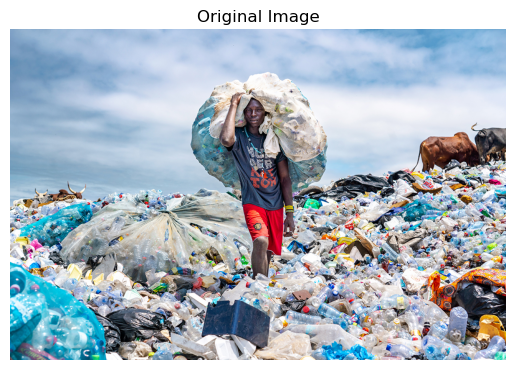

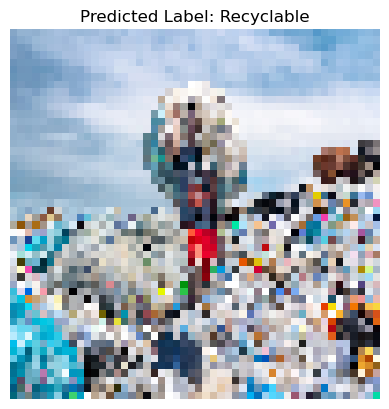

In [12]:
# Model - Prediction

import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings

# Suppress the warning related to feature names
warnings.filterwarnings("ignore", category=UserWarning)

# Load the trained model, PCA, and scaler from the pickle file
model_path = 'SVM_usingPCA.pkl'  
with open(model_path, 'rb') as model_file:
    model_and_pca = pickle.load(model_file)

svm_model = model_and_pca['model']
ipca = model_and_pca['pca']
scaler = model_and_pca['scaler']

# Load the original test image
test_image = cv2.imread('1.jfif')

# Display the original image
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# Resize test image
resize_width = 50
resize_height = 50

# Process test image (flatten)
resized_test_image = cv2.resize(test_image, (resize_width, resize_height))
flattened_test_image = resized_test_image.flatten()

# Test feature normalization
scaled_test_image = scaler.transform([flattened_test_image])

# Transform the test image using Incremental PCA
test_image_pca = ipca.transform(scaled_test_image)

# predict label
predicted_label = svm_model.predict(test_image_pca)

# Display the resized and processed image
plt.imshow(cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Label: {'Recyclable' if int(predicted_label[0]) == 1 else 'Organic'}")
plt.axis('off')
plt.show()


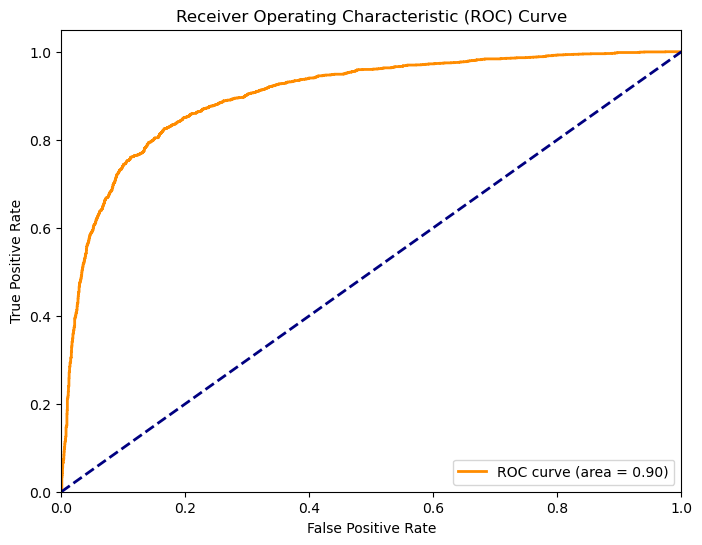

In [11]:
# ROC - CURVE (Draw TPR VS FPR)

# Reference - https://www.w3schools.com/python/python_ml_auc_roc.asp
# Reference - https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define y_scores using SVM model
y_scores_test = SVM_classifier.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_test)

# plot ROC-AUC using inbuilt function
roc_auc = auc(fpr, tpr)

# Use library Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC curve')
plt.legend(loc='lower right')
plt.show()


